<a href="https://colab.research.google.com/github/jvataidee/DataScienceR/blob/master/w4_Stanford_Resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://logodownload.org/wp-content/uploads/2021/04/stanford-university-logo.png" width="200"/>

**by: [João Ataíde](https://www.joaoataide.com/)**
___

# **RESAMPLING**

In [1]:
install.packages("ISLR2",lib='/usr/lib/R/library')
install.packages("MASS",lib='/usr/lib/R/library')
install.packages("e1071",lib='/usr/lib/R/library')
install.packages("class",lib='/usr/lib/R/library')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘proxy’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(ISLR2)
library(boot)
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:ISLR2’:

    Boston




In [6]:
?cv.glm

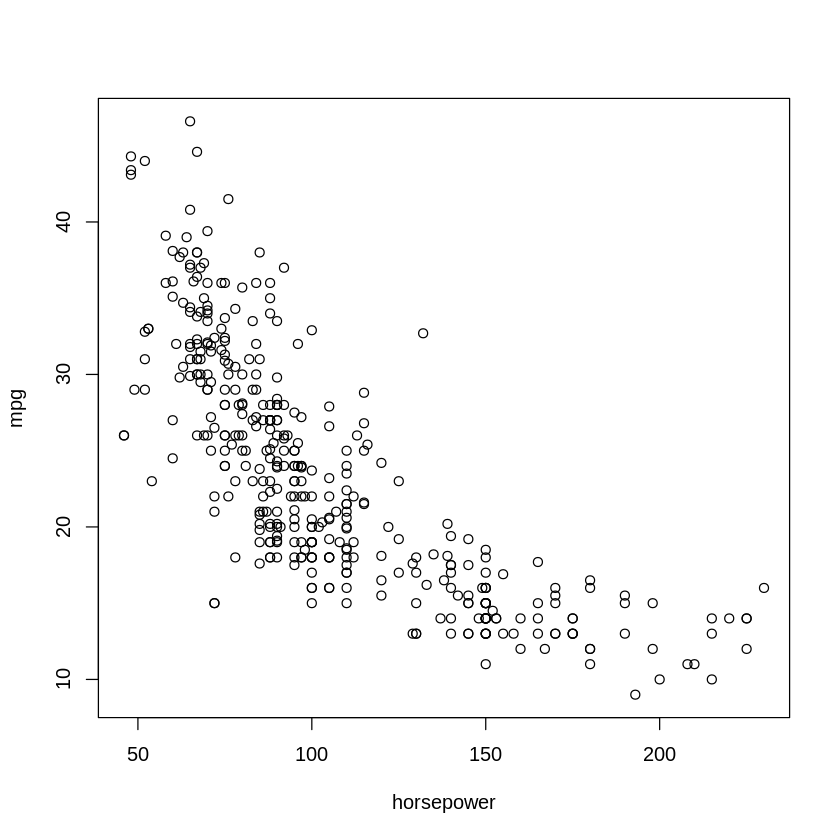

In [3]:
plot(mpg ~ horsepower, data = Auto)

In [5]:
cv.err = cv.glm(Auto, glm.fit)
cv.err$delta

[1] 24.23151 24.23114

In [8]:
cv.error = rep(0, 10)
for (i in 1:10) {
  glm.fit = glm(mpg ~ poly(horsepower, i), data = Auto)
  cv.error[i] = cv.glm(Auto, glm.fit)$delta[1]
}
cv.error

[1] 24.23151 19.24821 19.33498 19.42443 19.03321 18.97864 18.83305 18.96115
 [9] 19.06863 19.49093

In [9]:
set.seed(17)


cv.error.10 = rep(0, 10)
for (i in 1:10) {
  glm.fit = glm(mpg ~ poly(horsepower, i), data = Auto)
  cv.error.10[i] = cv.glm(Auto, glm.fit, K = 10)$delta[1]
}

cv.error.10

[1] 24.27207 19.26909 19.34805 19.29496 19.03198 18.89781 19.12061 19.14666
 [9] 18.87013 20.95520

## The Bootstrap

In [10]:
alpha.fn = function(data, index) {
  X <- data$X[index]
  Y <- data$Y[index]
  (var(Y) - cov(X, Y)) / (var(X) + var(Y) - 2 * cov(X, Y))
}

In [11]:
alpha.fn(Portfolio, 1:100)

[1] 0.5758321

In [12]:
alpha.fn(Portfolio, sample(100, 100, replace = T))

[1] 0.4630289

In [13]:
boot(Portfolio, alpha.fn, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 0.5758321 0.007172045  0.09044567

### Estimating the Accuracy of a Linear Regression Model

In [14]:
boot.fn = function(data, index)
  coef(lm(mpg ~ horsepower, data = data, subset = index))
boot.fn(Auto, 1:392)

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [15]:
boot.fn(Auto, sample(392, 392, replace = T))
boot.fn(Auto, sample(392, 392, replace = T))

(Intercept)  horsepower 
 39.2161162  -0.1537682

(Intercept)  horsepower 
 39.9004412  -0.1609552

In [16]:
boot(Auto, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
      original        bias    std. error
t1* 39.9358610  0.0669217807 0.854934158
t2* -0.1578447 -0.0006841165 0.007273415

In [17]:
summary(lm(mpg ~ horsepower, data = Auto))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),39.9358610,0.717498656,55.65984,1.220362e-187
horsepower,-0.1578447,0.006445501,-24.48914,7.031989e-81


In [19]:
boot.fn = function(data, index)
  coef(
    lm(mpg ~ horsepower + I(horsepower^2),
       data = data, subset = index)
  )

In [20]:
set.seed(1)
boot(Auto, boot.fn, 1000)
summary(lm(mpg ~ horsepower + I(horsepower^2), data = Auto))$coef


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original        bias     std. error
t1* 56.900099702  3.511640e-02 2.0300222526
t2* -0.466189630 -7.080834e-04 0.0324241984
t3*  0.001230536  2.840324e-06 0.0001172164

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),56.900099702,1.8004268063,31.60367,1.740911e-109
horsepower,-0.466189630,0.0311246171,-14.97816,2.289429e-40
I(horsepower^2),0.001230536,0.0001220759,10.08009,2.196340e-21
